In [1]:
from __future__ import print_function
import sys, os, math
import h5py
import numpy as np
from scipy import io
from os.path import join
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
sns.set_style('dark')

/groups/saalfeld/saalfeldlab/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# Load PyGreentea
# Relative path to where PyGreentea resides
sys.path.append('../../PyGreentea')
import PyGreentea as pygt

In [4]:
# Load the datasets
path = '/data-ssd/john/fly-light-atlas/affineExps/trainingData/'

name = 'I3-A6Affine'
imname='I3-A6Affine_trainingDat-Image.h5'
xfmname='I3-A6Affine_trainingDat-Transform.h5'

train_dataset = []
# Train set
train_dataset.append({})
train_dataset[-1]['name'] = name
train_dataset[-1]['data'] = np.transpose( np.array(h5py.File(join(path,imname),'r')['main'],dtype=np.float32), [2,1,0])[None,:]
train_dataset[-1]['label'] = np.transpose( np.array(h5py.File(join(path,xfmname),'r')['main'],dtype=np.float32), [3, 2, 1, 0])
train_dataset[-1]['pred'] = h5py.File(name+'.h5','r')['main']
train_dataset[-1]['transform'] = {}
train_dataset[-1]['transform']['scale'] = (0.8,1.2)
train_dataset[-1]['transform']['shift'] = (-0.2,0.2)

In [25]:
def showme(dset,z):
    imshape = dset['data'].shape
    predshape = dset['pred'].shape[1:]
    print( predshape )
    off = [(s[0]-s[1])/2 for s in zip(imshape,predshape)]
    slc1 = slice(off[1],predshape[1]-off[1])
    slc2 = slice(off[2],predshape[2]-off[2])
    print( off )
    print( slc1 )
    print( slc2 )
    
    #raw_slc=np.squeeze(dset['data'])[z,slc1,slc2]
    #tru_slc=np.squeeze(dset['label'])[1,z,slc1,slc2]
    #prd_slc=np.squeeze(dset['pred'])[1,z,slc1,slc2]
    
    raw_slc=np.squeeze(dset['data'])[z,:,:]
    tru_slc=dset['label'][1,z,:,:]
    prd_slc=dset['pred'][1,z,:,:]
    
    #test_slc=np.transpose(np.squeeze(dset['pred'][:3,z-off[0],:,:]),(2,1,0))
    #seg_slc=np.transpose(np.squeeze(dset['predseg'][z-off[0],:,:]),(1,0))

    f, ax = plt.subplots( 2, 2, sharey=True, figsize=(18.,12.));

    a=ax[0,0]
    #a.imshow(raw_slc)
    a.imshow(raw_slc,cmap=plt.cm.get_cmap('gray'))
    a.axis('off')
    
    a=ax[1,0]
    a.imshow(tru_slc,cmap=plt.cm.get_cmap('gray'))
    a.axis('off')
    
    a=ax[1,1]
    a.imshow(prd_slc,cmap=plt.cm.get_cmap('gray'))
    a.axis('off')

(132, 525, 536)
[-66, -153, 38]
slice(-153, 678, None)
slice(38, 498, None)


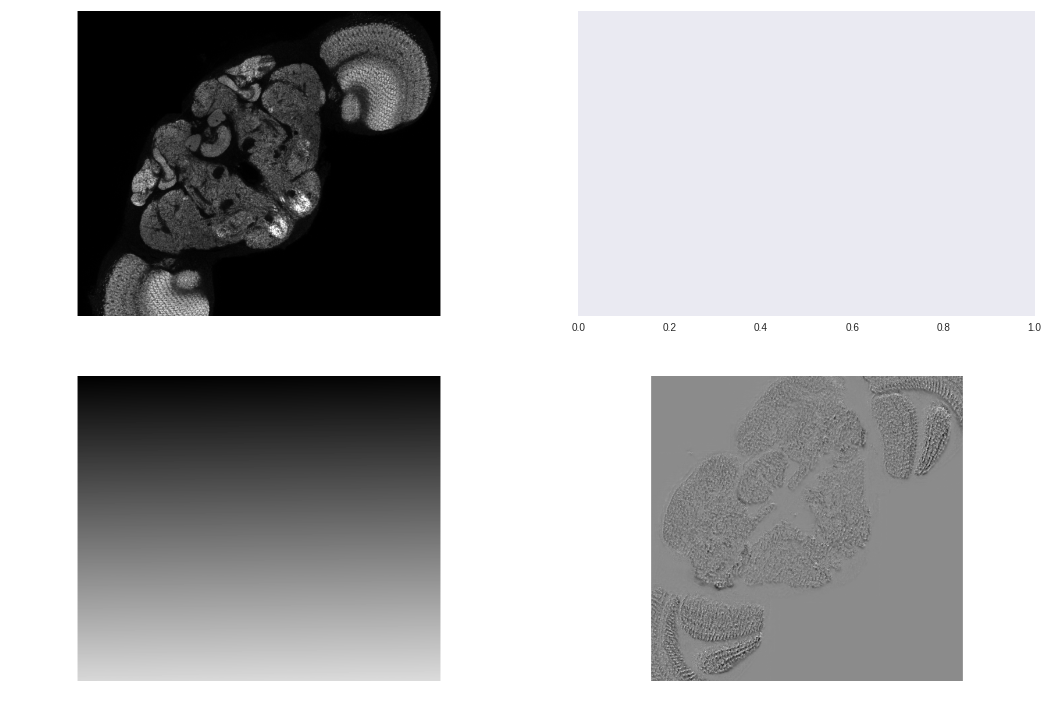

In [26]:
#z=100
#train_dataset[0]['data'].shape
#raw_slc=np.squeeze(train_dataset[0]['data'])[z,:,:]
#raw_slc.shape
showme(train_dataset[0],z=100)

In [ ]:
#raw_slc=np.squeeze(train_dataset[0]['data'])[100,:,:]
#raw_slc
#f, ax = plt.subplots(2,2, sharey=True, figsize=(18.,12.));

#ax.imshow(raw_slc)
#ax.axis('off')

#a=ax[0,0]
#a.imshow(raw_slc)
#a.imshow(raw_slc,cmap=plt.cm.get_cmap('gray'))
#a.axis('off')